In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_BRCpofr.csv')

In [3]:
test_df = pd.read_csv('test_koRSKBP.csv')

In [4]:
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [5]:
train_data.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [6]:
train_data.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [7]:
train_data.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [8]:
train_data.describe(include='all')

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392.000000,89392,89392,89392,89392,89392.000000,89392.000000,89392.000000,89392,89392,89392,89392.000000
unique,NaN,2,2,3,4,NaN,NaN,NaN,2,3,3,NaN
top,NaN,Male,Urban,High School,5L-10L,NaN,NaN,NaN,More than 1,A,Platinum,NaN
freq,NaN,50497,62455,46247,52716,NaN,NaN,NaN,60263,56644,47796,NaN
mean,44696.500000,NaN,NaN,NaN,NaN,0.575488,4.595669,4351.502416,NaN,NaN,NaN,97952.828978
std,25805.391969,NaN,NaN,NaN,NaN,0.494272,2.290446,3262.359775,NaN,NaN,NaN,90613.814793
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,24828.000000
25%,22348.750000,NaN,NaN,NaN,NaN,0.000000,3.000000,2406.000000,NaN,NaN,NaN,52836.000000
50%,44696.500000,NaN,NaN,NaN,NaN,1.000000,5.000000,4089.000000,NaN,NaN,NaN,66396.000000
75%,67044.250000,NaN,NaN,NaN,NaN,1.000000,6.000000,6094.000000,NaN,NaN,NaN,103440.000000


In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,89392.0,44696.500000,25805.391969,1.0,22348.75,44696.5,67044.25,89392.0
marital_status,89392.0,0.575488,0.494272,0.0,0.00,1.0,1.00,1.0
vintage,89392.0,4.595669,2.290446,0.0,3.00,5.0,6.00,8.0
claim_amount,89392.0,4351.502416,3262.359775,0.0,2406.00,4089.0,6094.00,31894.0
cltv,89392.0,97952.828978,90613.814793,24828.0,52836.00,66396.0,103440.00,724068.0


In [10]:
train_data.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [12]:
train_data.corr()

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


In [13]:
train_data.shape

(89392, 12)

In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

We have 7 categorical features : ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']


In [15]:
train_data_ = train_data.select_dtypes(exclude=['int', 'float'])
for col in train_data_.columns:
    print(train_data_[col].unique()) # to print categories name only
#     print(train_data_[col].value_counts()) # to print count of every category

['Male' 'Female']
['Urban' 'Rural']
['Bachelor' 'High School' 'Others']
['5L-10L' 'More than 10L' '2L-5L' '<=2L']
['More than 1' '1']
['A' 'C' 'B']
['Platinum' 'Gold' 'Silver']


In [16]:
# # replacing values
# df['gender'] = df['gender'].map({'Male' : 1, 'Female' : 0})
# train_data['area'].replace(['Urban', 'Rural'],[0, 1], inplace=True)
# train_data['qualification'].replace(['Bachelor', 'High School','Others'],[0, 1,2], inplace=True)
# train_data['income'].replace(['5L-10L', 'More than 10L','2L-5L','<=2L','2L-'],[0,1,2,3,4], inplace=True)
# train_data['num_policies'].replace(['More than 1', '1'],[0, 1], inplace=True)
# train_data['policy'].replace(['A', 'B','C'],[0, 1, 2], inplace=True)
# train_data['type_of_policy'].replace(['Platinum', 'Gold','Silver'],[0, 1, 2], inplace=True)

In [19]:
Q1 = train_data['claim_amount'].quantile(0.25)
Q3 = train_data['claim_amount'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Claim_Amount_outliers = train_data[(train_data['claim_amount'] < Q1 - whisker_width*IQR) | (train_data['claim_amount'] > Q3 + whisker_width*IQR)]
Claim_Amount_outliers

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
47,48,Female,Urban,Bachelor,2L-5L,1,6,16123,More than 1,A,Platinum,72168
101,102,Male,Urban,Bachelor,5L-10L,0,6,15703,More than 1,B,Platinum,63648
142,143,Male,Urban,High School,5L-10L,0,6,13304,More than 1,A,Platinum,360924
168,169,Male,Urban,Bachelor,2L-5L,0,4,12260,More than 1,A,Gold,131616
193,194,Male,Urban,High School,5L-10L,0,5,15311,1,A,Platinum,34980
...,...,...,...,...,...,...,...,...,...,...,...,...
89297,89298,Female,Urban,High School,More than 10L,0,2,12925,More than 1,A,Gold,60384
89342,89343,Male,Urban,High School,More than 10L,1,1,12159,More than 1,A,Platinum,55608
89353,89354,Female,Rural,Others,5L-10L,0,3,15361,More than 1,A,Platinum,66432
89357,89358,Male,Urban,High School,5L-10L,0,6,12911,More than 1,A,Silver,88908


In [20]:
Q1 = train_data['cltv'].quantile(0.25)
Q3 = train_data['cltv'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
cltv_outliers = train_data[(train_data['cltv'] < Q1 - whisker_width*IQR) | (train_data['cltv'] > Q3 + whisker_width*IQR)]
cltv_outliers

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
5,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
6,7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920
23,24,Male,Urban,High School,5L-10L,1,7,2933,More than 1,A,Platinum,265080
28,29,Female,Urban,High School,5L-10L,0,5,8145,More than 1,A,Silver,262260
...,...,...,...,...,...,...,...,...,...,...,...,...
89350,89351,Male,Rural,High School,More than 10L,0,6,0,1,B,Platinum,231672
89355,89356,Male,Urban,High School,5L-10L,1,3,9577,More than 1,A,Platinum,293256
89371,89372,Male,Urban,Bachelor,5L-10L,1,8,17143,More than 1,A,Platinum,277056
89373,89374,Female,Urban,Bachelor,2L-5L,1,8,5365,More than 1,B,Platinum,276348


In [21]:
train_data['gender'] = train_data['gender'].map({'Male' : 1, 'Female' : 0})
train_data['area'] = train_data['area'].map({'Urban' : 1, 'Rural' : 0})
train_data['qualification'] = train_data['qualification'].map({'Bachelor': 3,'High School' : 2 , 'Others' : 1})
train_data['income'] = train_data['income'].map({'More than 10L': 4,'5L-10L' : 3 , '2L-5L' : 2, '<=2L' : 1 })
train_data['num_policies'] = train_data['num_policies'].map({'More than 1': 1,'1' : 0})
train_data['type_of_policy'] = train_data['type_of_policy'].map({'Platinum' : 3, 'Gold' : 2, 'Silver' : 1})


In [28]:
policy = pd.get_dummies(train_data['policy'], drop_first=True) 
train_data.drop(columns='policy', inplace=True)
train_data =pd.concat([train_data,policy],axis=1)

In [29]:
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,B,C
0,1,1,1,3,3,1,5,5790,1,3,64308,0,0
1,2,1,0,2,3,0,8,5080,1,3,515400,0,0
2,3,1,1,3,3,1,8,2599,1,3,64212,0,0
3,4,0,0,2,3,0,7,0,1,3,97920,0,0
4,5,1,1,2,4,1,6,3508,1,2,59736,0,0


In [30]:
# train_data = train_data.select_dtypes(exclude=['int', 'float'])
# for col in train_data_.columns:
#     print(train_data_[col].unique()) # to print categories name only
# #     print(train_data_[col].value_counts()) # to print count of every category

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              89392 non-null  int64
 1   gender          89392 non-null  int64
 2   area            89392 non-null  int64
 3   qualification   89392 non-null  int64
 4   income          89392 non-null  int64
 5   marital_status  89392 non-null  int64
 6   vintage         89392 non-null  int64
 7   claim_amount    89392 non-null  int64
 8   num_policies    89392 non-null  int64
 9   type_of_policy  89392 non-null  int64
 10  cltv            89392 non-null  int64
 11  B               89392 non-null  uint8
 12  C               89392 non-null  uint8
dtypes: int64(11), uint8(2)
memory usage: 7.7 MB


In [32]:
# Changing the existing data types into the required data types for the some features for better EDA
objects = [features for features in train_data.columns if train_data[features].dtypes=='O']
for i in objects:
    if i != 'cltv':
        train_data[i] = train_data[i].astype(float)

In [33]:
train_data.dtypes

id                int64
gender            int64
area              int64
qualification     int64
income            int64
marital_status    int64
vintage           int64
claim_amount      int64
num_policies      int64
type_of_policy    int64
cltv              int64
B                 uint8
C                 uint8
dtype: object

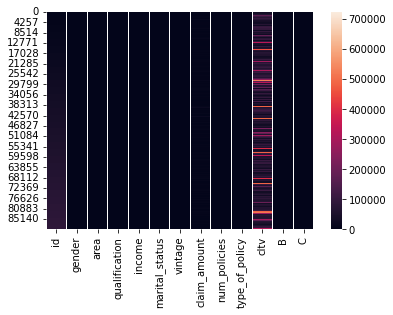

In [34]:
sns.heatmap(train_data)

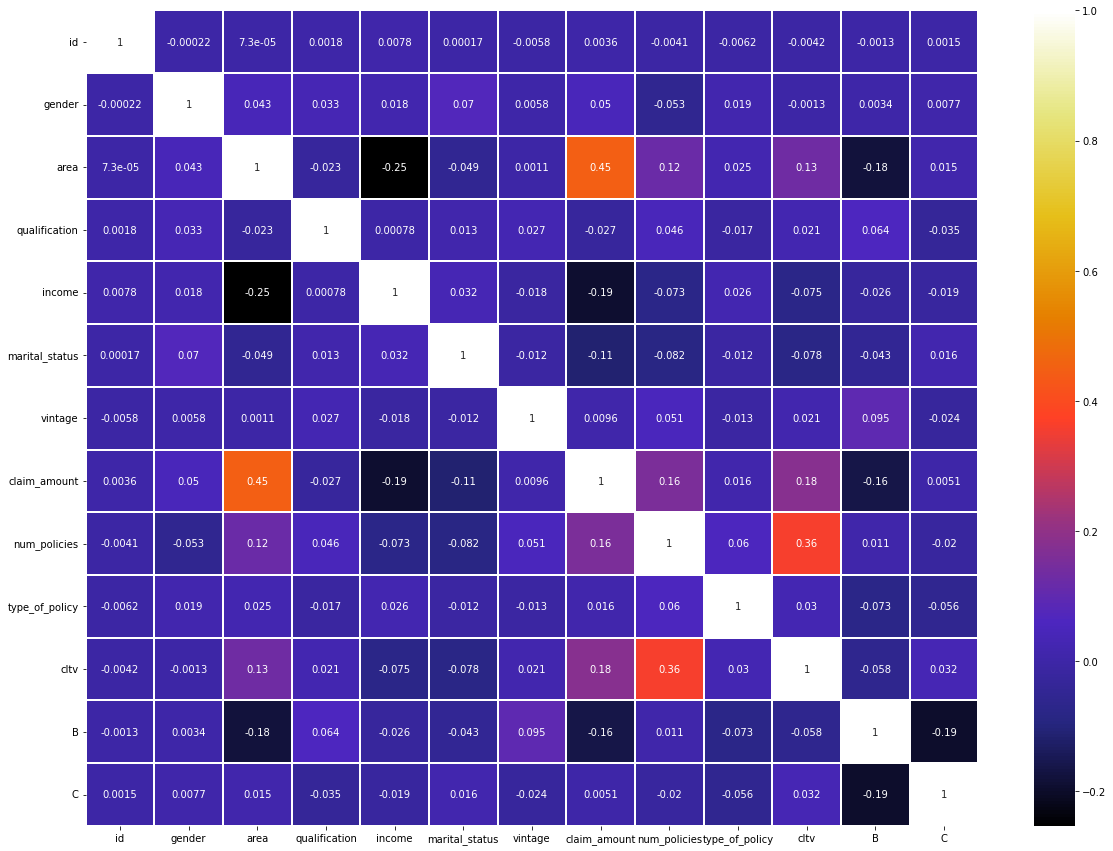

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "CMRmap",xticklabels="auto", yticklabels="auto")

In [37]:
X = train_data[[
 'gender',
 'area',
 'qualification',
 'income',
 'marital_status',
 'vintage',
 'claim_amount',
 'num_policies',
 'type_of_policy',
 'B',
 'C']]
y= train_data[['cltv']]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.25)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [42]:
corr = train_data.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:                       id    gender      area  qualification    income  \
id              1.000000 -0.000215  0.000073       0.001803  0.007826   
gender         -0.000215  1.000000  0.042516       0.033076  0.018393   
area            0.000073  0.042516  1.000000      -0.022908 -0.252890   
qualification   0.001803  0.033076 -0.022908       1.000000  0.000780   
income          0.007826  0.018393 -0.252890       0.000780  1.000000   
marital_status  0.000171  0.070468 -0.048739       0.012618  0.031632   
vintage        -0.005824  0.005827  0.001145       0.027283 -0.017830   
claim_amount    0.003634  0.049773  0.451054      -0.027440 -0.193800   
num_policies   -0.004105 -0.052871  0.121898       0.045894 -0.072862   
type_of_policy -0.006179  0.018847  0.025001      -0.016678  0.025746   
cltv           -0.004223 -0.001318  0.133107       0.021330 -0.074871   
B              -0.001300  0.003375 -0.176116       0.064155 -0.025631   
C               0.00146

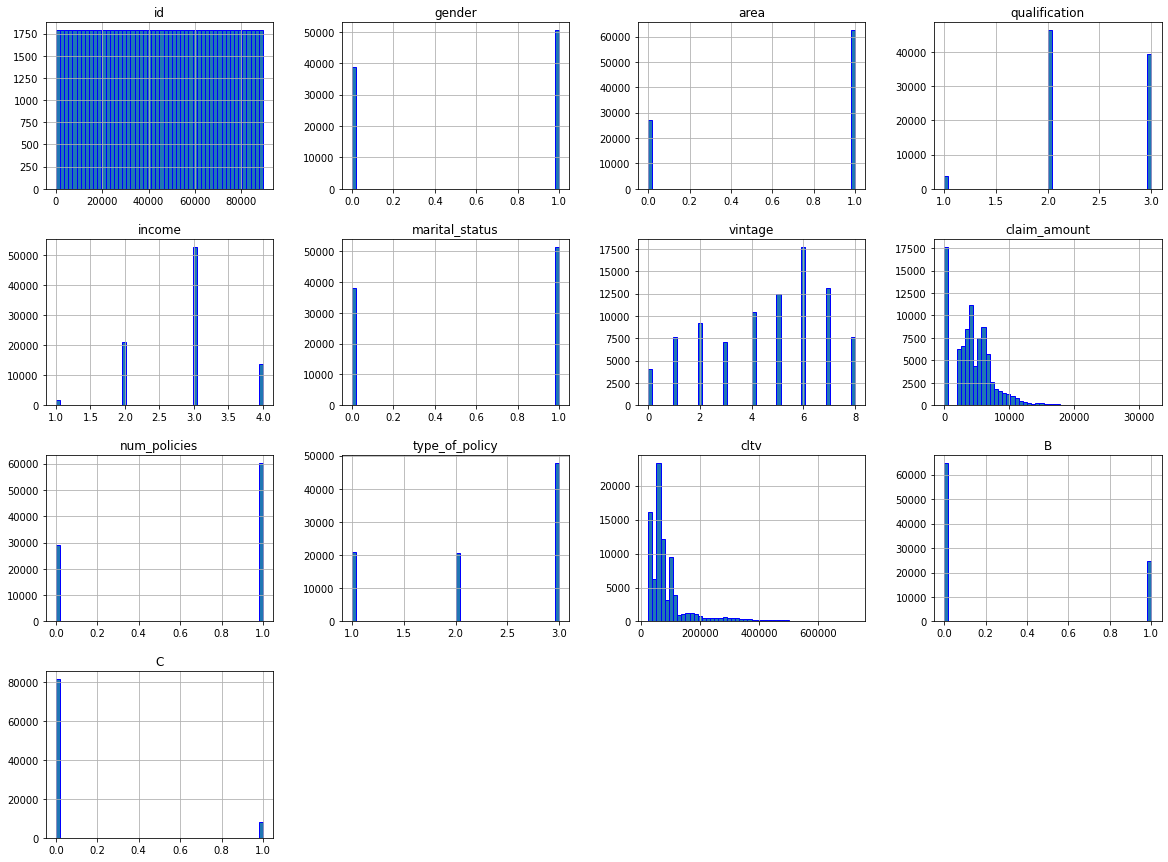

In [43]:
train_data.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [44]:
X.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'type_of_policy', 'B', 'C'],
      dtype='object')

In [46]:
y

,cltv
0,64308
1,515400
2,64212
3,97920
4,59736
...,...
89387,95736
89388,67596
89389,114120
89390,71772


In [47]:
X

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,B,C
0,1,1,3,3,1,5,5790,1,3,0,0
1,1,0,2,3,0,8,5080,1,3,0,0
2,1,1,3,3,1,8,2599,1,3,0,0
3,0,0,2,3,0,7,0,1,3,0,0
4,1,1,2,4,1,6,3508,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
89387,1,0,2,4,0,6,0,1,3,1,0
89388,1,1,3,3,1,0,3897,1,3,0,0
89389,0,1,3,3,0,4,3363,1,3,1,0
89390,0,0,2,2,0,8,0,1,3,1,0


In [ ]:
!pip install lazypredict

In [48]:
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [49]:
# Instantiation
xgb_r = xg.XGBRegressor()
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
y_pred_xg = xgb_r.predict(X_test)

# #r2 score test
print(f"Test Score : {round(r2_score(y_test, y_pred_xg),2)}")

# #r2 score test
print(f"Train Score : {round(r2_score(y_train, xgb_r.predict(X_train)),2)}")

MSE_XG = round(mean_squared_error(y_test, y_pred_xg),2)
MAE_XG = round(mean_absolute_error(y_test, y_pred_xg),2)
RMSE_XG =  round(np.sqrt(mean_squared_error(y_test, y_pred_xg)),2)
print(f"MSE : {MSE_XG}\nMAE : {MAE_XG}\nRMSE : {RMSE_XG}")

XG_r2_score = round(r2_score(y_test, y_pred_xg),3)
XG_adj_r2_score = round(1-((1-XG_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),3)
print(f"Test>R-Squared Accuracy : {XG_r2_score}  \nTest>Adjusted R-Squared Accuracy : {XG_adj_r2_score}")

XG_train_r2_score = round(r2_score(y_train, xgb_r.predict(X_train)),3)
XG_train_adj_r2_score = round(1-((1-XG_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),3)
print(f"Train> R-Squared Accuracy : {XG_train_r2_score}  \nTrain>Adjusted R-Squared Accuracy : {XG_train_adj_r2_score}")

[15:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test Score : 0.16
Train Score : 0.17
MSE : 6782883429.6
MAE : 50149.26
RMSE : 82358.26
Test>R-Squared Accuracy : 0.163  
Test>Adjusted R-Squared Accuracy : 0.163
Train> R-Squared Accuracy : 0.166  
Train>Adjusted R-Squared Accuracy : 0.166


In [ ]:
# ''' Detection '''
# # IQR
# Q1 = np.percentile(train_data['income'], 25,
#                    interpolation = 'midpoint')
 
# Q3 = np.percentile(train_data['income'], 75,
#                    interpolation = 'midpoint')
# IQR = Q3 - Q1
 
# print("Old Shape: ", train_data.shape)
 
# # Upper bound
# upper = np.where(train_data['vintage'] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(train_data['vintage'] <= (Q1-1.5*IQR))
 
# ''' Removing the Outliers '''
# train_data.drop(upper[0], inplace = True)
# train_data.drop(lower[0], inplace = True)
 
# print("New Shape: ", train_data.shape)

In [ ]:
train_data.describe()

In [ ]:
# ''' Detection '''
# # IQR
# Q1 = np.percentile(train_data['type_of_policy'], 25,
#                    interpolation = 'midpoint')
 
# Q3 = np.percentile(train_data['type_of_policy'], 75,
#                    interpolation = 'midpoint')
# IQR = Q3 - Q1
 
# print("Old Shape: ", train_data.shape)
 
# # Upper bound
# upper = np.where(train_data['type_of_policy'] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(train_data['type_of_policy'] <= (Q1-1.5*IQR))
 
# ''' Removing the Outliers '''
# train_data.drop(upper[0], inplace = True)
# train_data.drop(lower[0], inplace = True)
 
# print("New Shape: ", train_data.shape)

In [50]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
print("------------------------------------------------Ridge Regression with Scaled Data----------------------------------------------")
ridge = Ridge()
ridge.fit(X_train,y_train)
prediction_ridge = ridge.predict(X_test)
score = r2_score(y_test, prediction_ridge)
mae = mean_absolute_error(prediction_ridge, y_test)

print("Score:", score)
print("Mean Absolute Error:", mae)

------------------------------------------------Ridge Regression with Scaled Data----------------------------------------------
Score: 0.1541655682089652
Mean Absolute Error: 51243.11451390982


In [52]:
import pandas as pd
#taking the mean of cltv from the training set
pd.concat([test_df['id'], pd.DataFrame(prediction_ridge, columns = ['cltv'])], axis = 1).to_csv('my_submission.csv')